CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Mean Squared Error: 41.01145441904804
R2 Score: 0.5137736507938266
회귀 계수: [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편: -3.831014747888208


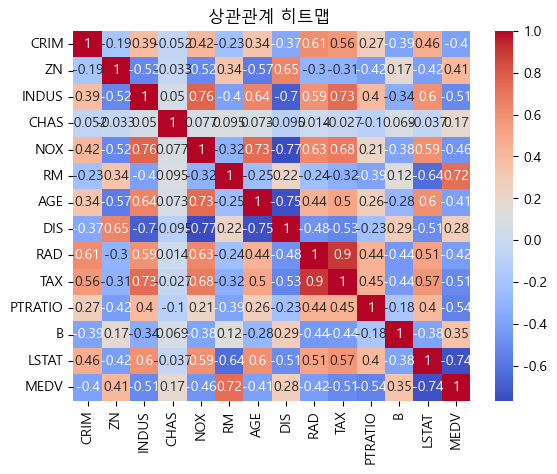

In [ ]:
### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 데이터 로드
data = pd.read_csv('./dataset/HousingData.csv')

# 데이터 잘 불러왔나 확인
# data.head()
# data.info()

# 결측값 확인 및 처리
print(data.isnull().sum())
data = data.dropna()

print(data.isnull().sum())

# 변수 "선택"
X = data[['CRIM', 'RM', 'TAX', 'LSTAT']] # 입력 변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율)
y = data['MEDV'] # 타겟 변수 (집값)

# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test) # 새로운 값, 안해본값을 넣어야 예측능력이 올라감
mse = mean_squared_error(y_test, y_pred) # 오차 (결과와 예측)
r2 = r2_score(y_test, y_pred) # 결정계수 (결과와 예측)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 히트맵
plt.Figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('상관관계 히트맵 ')
plt.show()


0.660986, 28.594602
LinearRegression - MSE: 36.34, R2: 0.57
Decision Tree - MSE: 27.30, R2: 0.68

최적 모델: Decision Tree


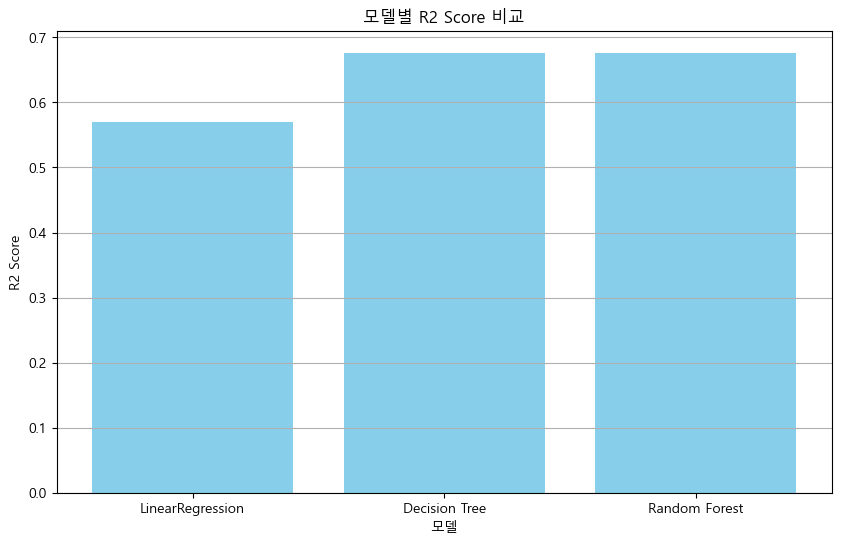

In [ ]:
#랜덤포레스트 모델 활용한 예제(cf. 다른 회귀모델 성능 비교)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

# 데이터 전처리
data = data.dropna()  # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pr = rf_model.predict(X_test)

# 랜덤 포레스트 평가 
r2 = r2_score(y_test, rf_pr)
mse = mean_squared_error(y_test, rf_pr)
print(f"{r2:2f}, {mse:2f}")


# 2. 다른 모델 비교
model = {
    
    "LinearRegression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42)
    
}

results = {}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2":r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")
    
# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": mse, "R2": r2}
best_model = max(results, key=lambda x: results[x]['R2'])
print("\n최적 모델:", best_model)

# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

In [102]:
# 랜덤포레스트 하이퍼파라미터 튜닝(옵션)
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5 , 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("최적 하이퍼파라미터", grid_search.best_params_)
best_model = grid_search.best_estimator_
tuned_rf_y_pred = best_model.predict(X_test)

# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")

최적 하이퍼파라미터 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
튜닝된 랜덤 포레스트 - MSE: 28.63, R2: 0.66


In [41]:
#미세먼지(PM10) 예측 예제 (랜덤포레스트 모델)

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format



file_path = "dataset/seoul_pm10.csv"
df = pd.read_csv(file_path, encoding='cp949')
print("데이터크기", df.shape)
display(df.head())

# 기본 데이터 정보 확인
print("데이터 기간", df['date'].min(), "~", df['date'].max())
print("총 관측 수", len(df))
print("지역 수:", df['area'].nunique())

# 결측치 개수 출력 수정
print(" 결측치 개수: ")
print(df.isnull().sum())

# "데이터 전처리" (데이터를 보고 바꿀 부분 바꾸기)
# 날씨 변환
df['date'] = pd.to_datetime(df['date'])

# 결측치 처리
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

# 시간 관련 피쳐 추가
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# 지역 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['area'], prefix='area')

# "전처리된 데이터 확인"
display(df_encoded.head())


# PM10 "모델 학습"
features_pm10 = ['pm2.5', 'hour', 'day_of_week', 'month'] + [ col for col in df_encoded.columns if col.startswith('area')]
X_pm10 = df_encoded[features_pm10]
y_pm10 = df_encoded['pm10']

# PM2.5 모델 학습
features_pm25 = ['pm10', 'hour', 'day_of_week', 'month'] + [ col for col in df_encoded.columns if col.startswith('area')]
X_pm25 = df_encoded[features_pm25]
y_pm25 = df_encoded['pm2.5']

# 데이터 분할
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

# 모델 학습 2 (랜덤포레스트)
model_pm10 = RandomForestRegressor(n_estimators=100, random_state=42)
model_pm25 = RandomForestRegressor(n_estimators=100, random_state=42)
model_pm10.fit(X_train_pm10, y_train_pm10)
model_pm10.fit(X_train_pm25, y_train_pm25)

# 모델 평가
Y_pred_pm10 = model_pm10.predict(X_test_pm10)
Y_pred_pm25 = model_pm25.predict(X_test_pm25)

print(" 10 모델 성능")
print(f"R2 score: {r2_score(y_test_pm10, y_pred_pm10):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm10, y_pred_pm10):.4f}")

print(" 2.5 모델 성능")
print(f"R2 score: {r2_score(y_test_pm25, Y_pred_pm25):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm25, Y_pred_pm25):.4f}")

# 시간 예측을 위한 함수
def create_prediction_data(area):
    predictions = []
    for hour in range(24):
        pred_data = {
            'hour': hour,
            'day_of_week': 6,
            'month': 1    
        }
        
        # 지역 원 핫 인코딩
        for area_col in [col for col in df_encoded.columns if col.startswith('area')]:
            pred_data[area_col] = 1 if area_col == f'area_{area}' else 0
            
        predictions.append(pred_data)
        
        return pd.DataFrame(predictions)
    
    # 사용자 입력으로 지역 선택
    areas = sorted(df['area'].unique()) 
    print("예측 가능한 지역")
    display(areas)  
    
    # 예시 지역 선택 
    selected_area = areas[0]
    print(f"선택된 지역: {selected_area}")
    
    # 2023년 1월 1일 미세먼지 예측
    future_data = create_prediction_data(selected_area)
    pm10_predictions = []
    pm25_predictions = []
    
    # 반복 예측 (PM10과 PM2.5 상호 의존성 처리)
    for hour in range(24):
        hour_data = future_data.iloc[[hour]].copy()
        
        #초기값 설정
        hour_data['pm2.5'] = df['pm2.5'].mean()
        hour_data['pm10'] = df['pm10'].mean()
        
        #반복 예측으로 정확도 향상
        for _ in range(3):
            pm10_pred = model_pm10.predict(hour_data[features_pm10])
            pm25_pred = model_pm25.predict(hour_data[features_pm25])
            
            hour_data['pm10'] = pm10_pred
            hour_data['pm2.5'] = pm25_pred
            
        pm10_predictions.append(pm10_pred[0])
        pm25_predictions.append(pm25_pred[0])
        
    # 예측 결과 시각화
    plt.figure(figsize=(15,10))
        
    # PM10 그래프
    plt.subplot(2, 1, 1)
    plt.plot(range(24), pm10_predictions, marker='o', linewidth=2, markersize=8)
    plt.title(f'{selected_area} PM10 예측 (2023년 1월 1일)')
    plt.xlabel('시간')
    plt.ylabel('농도 (μg/m³)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # PM2.5 그래프
    plt.subplot(2, 1, 2)
    plt.plot(range(24), pm25_predictions, marker='o', linewidth=2, markersize=8, color='orange')
    plt.title(f'{selected_area} PM2.5 예측 (2023년 1월 1일)')
    plt.xlabel('시간')
    plt.ylabel('농도 (μg/m³)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()    


데이터크기 (227759, 4)


,date,area,pm10,pm2.5
0,2022-12-31 23:00,강남구,57.00,44.00
1,2022-12-31 23:00,강동구,68.00,55.00
2,2022-12-31 23:00,강북구,59.00,42.00
3,2022-12-31 23:00,강서구,62.00,40.00
4,2022-12-31 23:00,관악구,57.00,38.00


데이터 기간 2022-01-01 0:00 ~ 2022-12-31 9:00
총 관측 수 227759
지역 수: 26
 결측치 개수: 
date        0
area        0
pm10     4916
pm2.5    4247
dtype: int64


,date,pm10,pm2.5,hour,day_of_week,month,area_강남구,area_강동구,area_강북구,area_강서구,...,area_성북구,area_송파구,area_양천구,area_영등포구,area_용산구,area_은평구,area_종로구,area_중구,area_중랑구,area_평균
0,2022-12-31 23:00:00,57.00,44.00,23,5,12,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022-12-31 23:00:00,68.00,55.00,23,5,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-12-31 23:00:00,59.00,42.00,23,5,12,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-12-31 23:00:00,62.00,40.00,23,5,12,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2022-12-31 23:00:00,57.00,38.00,23,5,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pm2.5
Feature names seen at fit time, yet now missing:
- pm10


In [101]:
# 직원 퇴사예측 예제
# 컬럼 설명 : satisfaction_level(직원만족도점수), last_evaluation(고용주평가점수), numbers_projects(할당된 프로젝트수)
# average_monthly_hours(한달동안 직원이 일한 평균시간), time_spent_company(회사에서 근무한 연수), work_accident(근무중 사고유무무)
# promotion_last_5years(지난 5년 직원이 승진했는지 여부), Departments(부서), Salary(월급수준 낮음, 중간, 높음), left(직원퇴사 여부)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 데이터 로드
df = pd.read_csv('dataset/HR_comma_sep.csv', encoding='cp949')

# 데이터 확인
df.head()

#'left'열이 정수형인지 확인하고 필요시 변환
if df['left'].dtype != 'int64':
    df['left'] = df['left'].astype(int)
    
    #범주형 변수 전처리
    # 'Departments' 끝 공백 제거
    df.rename(columns={'Departments': 'Departments'}, inplace=True)
    
    #원-핫 인코딩 (범주형 변수 처리)
    df = pd.get_dummies(df, columns=['Departments', 'salary'], drop_first=True)
    df.head()
    
    # X Y 설정
    X = df.drop('left', axis=1)
    y = df['left']
    
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 랜덤포레스트 모델학습
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # 예측
    y_pred = model.predict(X_test_scaled)
    
    # 평가
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"accurancy, {accuracy:.2f}")   
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))  
    
    # 중요도 확인 
    feature_importances = pd.DataFrame({
        'Feature' : X.columns,
        'importance' : model.feature_importances_
    }).sort_values(by='Importance', asceding=False)
    
    print(feature_importances)